<div style="float:right"><i>Peter Norvig, 15 June 2015</i></div>

# Let's Code About Bike Locks

The [June 15, 2015 post on Bike Snob NYC](http://bikesnobnyc.blogspot.com/2015/06/lets-get-this-show-on-road-once-we-all.html) leads with "*Let's talk about bike locks.*" Here's what I want to talk about: in a local bike shop, I saw a combination  lock called *WordLock&reg;*,
which replaces digits  with  letters.   I classified this as a Fred lock,
"Fred" being the term ([championed](http://bikesnobnyc.blogspot.com/2014/06/a-fred-too-far.html) by
Bike Snob NYC) for an amateurish bicyclist with the wrong equipment.
I tried the combination "FRED," and was amused with the result:

<p><center><img src="http://norvig.com/ipython/fredbuns.jpg"></center>
<p>


FRED BUNS! Naturally I bought the lock (and set the other ones on the rack to FRED BUNS as well). Unfortunately,  it turns out the combination on each lock is pre-set; it can't be changed to FRED BUNS (some other models of WordLock&reg; are user-settable).
But we can still have fun writing  code to answer some questions about
the WordLock&reg;:

Questions
====

1. How many words can the WordLock&reg; make?
3. Can a lock with different letters on the tumblers make more words? 
4. How many words can be made simultaneously? For example, with the tumbler set to "FRED", the lock
above also makes "BUNS" in the next line, but with "SOMN", fails to make a word in the third line.
Could different letters make words in every horizontal line?
5. Is it a coincidence that the phrase "FRED BUNS" appears, or was it planted there by mischievous WordLock&reg; designers? 

Vocabulary
===

Before we can answer the questions, we'll need to be clear about the vocabulary of the problem and how to represent concepts in code:

* **Lock**: For our purposes a lock can be modeled as a `list` of 4 **tumblers**. 
* **Tumbler:** Each tumbler has letters on it; in the lock above there are 4 tumblers, each with 10 distinct letters. I will represent a tumbler as a `str` of 10 letters.
* **Combination**: Choosing a letter from each tumbler gives a combination, such as "FRED" or "BUNS". There are 4<sup>10</sup> = 10,000 combinations.
* **Word**: Some combinations (such as "BUNS") are *words*; others (such as "SOMN") are not words. We'll need a list of dictionary words.

Now on to the code!  I took all the `import`s that were scattered throughout this notebook as I developed it and moved them here:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division, print_function
from collections import Counter, defaultdict
import itertools
import random 
random.seed(42)

I will define `fredbuns` to be a lock with four tumblers. For now, each tumbler will consist of not all ten letters, but only the two letters that spell "FRED BUNS": 

In [2]:
fredbuns = ['FB', 'RU', 'EN', 'DS'] # A lock with two letters on each of four tumblers

We need a way to get the combinations that can be made from this lock.  It turns out that the built-in function `itertools.product` does the job; it generates the product of all 2 &times; 2 &times; 2 &times; 2 = 16 combinations of letters:

In [3]:
list(itertools.product(*fredbuns))

[('F', 'R', 'E', 'D'),
 ('F', 'R', 'E', 'S'),
 ('F', 'R', 'N', 'D'),
 ('F', 'R', 'N', 'S'),
 ('F', 'U', 'E', 'D'),
 ('F', 'U', 'E', 'S'),
 ('F', 'U', 'N', 'D'),
 ('F', 'U', 'N', 'S'),
 ('B', 'R', 'E', 'D'),
 ('B', 'R', 'E', 'S'),
 ('B', 'R', 'N', 'D'),
 ('B', 'R', 'N', 'S'),
 ('B', 'U', 'E', 'D'),
 ('B', 'U', 'E', 'S'),
 ('B', 'U', 'N', 'D'),
 ('B', 'U', 'N', 'S')]

*Note:* `product(*fredbuns)` means to apply the function `product` to the list  `fredbuns`; this is equivalent to `itertools.product('FB', 'RU', 'EN', 'DS')`.

I would prefer to deal with the string `'BUNS'` rather than the tuple `('B', 'U', 'N', 'S')`, so I will define a function, `combinations`, that takes a lock as input and returns a list of strings representing the combinations:

In [4]:
def combinations(lock):
    "Return a list of all combinations that can be made by this lock."
    return [cat(c) for c in itertools.product(*lock)]

cat = ''.join  # Function to concatenate strings together.

In [5]:
combinations(fredbuns)

['FRED',
 'FRES',
 'FRND',
 'FRNS',
 'FUED',
 'FUES',
 'FUND',
 'FUNS',
 'BRED',
 'BRES',
 'BRND',
 'BRNS',
 'BUED',
 'BUES',
 'BUND',
 'BUNS']

Dictionary Words
===

I happen to have handy a file of four-letter words (no, not *[that](http://en.wikipedia.org/wiki/Four-letter_word)* kind of four-letter word). It is the union of an official Scrabble&reg; word list and a list of proper names. The following shell command tests if the file has already been downloaded to our local directory and if not, fetches it from the web:

In [6]:
! [ -e words4.txt ] || curl -O http://norvig.com/ngrams/words4.txt

Here are the first few lines of the file:

In [7]:
! head words4.txt

AADI
AAHS
AALS
ABAS
ABBA
ABBE
ABBY
ABED
ABEL
ABET


Python can make a set of words:

In [8]:
WORDS = set(open('words4.txt').read().split())

In [9]:
len(WORDS)

4360

So that means that no lock could ever make more than 4,360 words.  Let's define `words_from(lock)`:

In [10]:
def words_from(lock): 
    "A list of words that can be made by lock."
    return [c for c in combinations(lock) if c in WORDS]

In [11]:
words_from(fredbuns)

['FRED', 'FUND', 'FUNS', 'BRED', 'BUND', 'BUNS']

*Note*: An alternative is to represent a collection of words as a `set`, not a `list`; then `words_from` could be implemented as: `return combinations(lock) & WORDS`. 

I will also introduce the function `show` to print out a lock and its words:

In [12]:
def show(lock):
    "Show a lock and the words it makes."
    words = words_from(lock)
    N = len(lock[0]) ** len(lock)
    print('Lock: {}\n\nWords: {}\n\nNumber of Words: {} / {}'
          .format(space(lock), space(sorted(words)), len(words), N))
    
space = ' '.join  # Function to concatenate strings with a space between each one.

In [13]:
show(fredbuns)

Lock: FB RU EN DS

Words: BRED BUND BUNS FRED FUND FUNS

Number of Words: 6 / 16


For this tiny lock with just two letters on each tumbler, we find that 6 out of the 16 possible combinations are words. We're now ready to answer the real questions.

# Question 1: How Many Words?

Here is the answer:

In [14]:
wordlock = ['SPHMTWDLFB', 'LEYHNRUOAI', 'ENMLRTAOSK', 'DSNMPYLKTE']

In [15]:
show(wordlock)

Lock: SPHMTWDLFB LEYHNRUOAI ENMLRTAOSK DSNMPYLKTE

Words: BAAL BAAS BAKE BALD BALE BALK BALL BALM BALS BAMS BAND BANE BANK BANS BARD BARE BARK BARM BARN BARS BASE BASK BASS BAST BATE BATS BATT BEAD BEAK BEAM BEAN BEAT BEEN BEEP BEES BEET BELL BELS BELT BEND BENE BENS BENT BERK BERM BEST BETS BIAS BIKE BILE BILK BILL BIND BINE BINS BINT BIOS BIRD BIRK BIRL BISE BISK BITE BITS BITT BLAE BLAM BLAT BLED BLET BLOT BOAS BOAT BOLD BOLE BOLL BOLT BOND BONE BONK BONY BOOK BOOM BOON BOOS BOOT BORE BORK BORN BORT BOSK BOSS BOTS BOTT BRAD BRAE BRAN BRAS BRAT BRAY BRED BREE BREN BROS BULK BULL BUMP BUMS BUND BUNK BUNN BUNS BUNT BUOY BURD BURL BURN BURP BURS BURY BUSK BUSS BUST BUSY BUTE BUTS BUTT BYES BYRE BYRL BYTE DAKS DALE DALS DAME DAMN DAMP DAMS DANE DANK DANS DARE DARK DARN DART DATE DEAD DEAL DEAN DEED DEEM DEEP DEES DEET DEKE DELE DELL DELS DELT DEME DEMY DENE DENS DENT DENY DEON DERE DERM DESK DHAK DHAL DIAL DIED DIEL DIES DIET DIKE DILL DIME DIMS DINE DINK DINS DINT DIOL DION DIRE DIRK DI

# How Secure is WordLock?

The lock makes 1118 words (according to my word list).  You might say that an attacker who knows the combination is a word would find this lock to be only 11.18% as secure as a 4-digit lock with 10,000 combinations.  But in reality, every cable lock is [vulnerable](https://www.sfbike.org/news/video-how-to-lock-your-bike/) to an attacker with wire  cutters, or with a knowledge of lock-picking, so  security is equally poor for WordLock&reg; and for an equivalent lock with numbers. (Get a hardened steel U-lock.)

# Random Locks

Question 2 asks if a different lock can make more words.  As a baseline, before we get to improved locks, I will start with completely random locks, as produced by the function `random_lock`. Note that I use `d=4` to say that by default there are 4 tumblers, and `c=10` to indicate 10 letters on each tumbler (you can think of "c" for "circumference" of the tumbler); I will use `d` and `c` throughout, and even though I won't stray from the default values, it is comforting to know I could if I wanted to.

In [16]:
def random_lock(d=4, c=10):
    "Make a lock by sampling randomly and uniformly from the alphabet."
    return Lock(Tumbler(random.sample(alphabet, c))
                for i in range(d))

Lock     = list                         # A Lock is a list of tumblers
Tumbler  = cat                          # A Tumbler is 10 characters joined into a str
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ' # The 26 letters

In [17]:
show(random_lock())

Lock: UDAIHVEYRC SNBACGHQWU WUZRNHOSIA YFWNKIEGVD

Words: ABRI ACHE ACHY ACID ACNE ACRE AGIN AGOG AGON AGUE AHOY ANAY ANNE ANON ASHY AWAY AWNY AWRY CAID CAIN CANE CARD CARE CARK CARN CASE CASK CHAD CHAI CHAW CHAY CHID CHIN CHON CHOW CHUG CUIF CURD CURE CURF CURN CUSK DANE DANG DANI DANK DARE DARK DARN DAWK DAWN DAZE DHAK DHOW DUAD DUNE DUNG DUNK DURE DURN DUSK EARN EASE EASY EBON ECHE EGAD ENOW ENUF ESAI ESNE EWAN HAAF HAIK HAND HANG HANK HARD HARE HARK HAWK HAZE HAZY HUNG HUNK HUSK HWAN ICON ISAI RAID RAIN RAND RANG RANI RANK RARE RASE RAZE RUIN RUNE RUNG RUSE RUSK UNAI VAIN VANE VANG VARY VASE YANG YANK YARD YARE YARN YAUD YAWN YUAN

Number of Words: 117 / 10000


Wow, that's not very many words. Let's repeat 100 times and take the best one, with "best" determined by the function `word_count`:

In [18]:
def word_count(lock): return len(words_from(lock))

In [19]:
random_locks = [random_lock() for _ in range(100)]

show(max(random_locks, key=word_count))

Lock: NWEPCHMVDR KLJEMWUCQA TUFOLGENWY CDEYSMLNKX

Words: CAEL CAFE CAGE CAGY CALE CALK CALL CALM CALX CANE CANS CATE CATS CAUL CAWS CAYS CEES CELL CELS CETE CLOD CLON CLOY CLUE CUED CUES CULL CULM CUTE CUTS DAGS DALE DALS DANE DANK DANS DATE DAWK DAWN DAWS DAYS DEED DEEM DEES DEFY DELE DELL DELS DENE DENS DENY DEON DEWS DEWY DEYS DUEL DUES DUGS DULL DULY DUNE DUNK DUNS DUOS DUTY EATS EAUX ECUS EELS EELY EKED EKES ELLE ELLS ELLY EMES EMUS EMYD EWES HAED HAEM HAEN HAES HAGS HALE HALL HALM HAND HANK HANS HATE HATS HAUL HAWK HAWS HAYS HEED HEEL HELD HELL HELM HENS HETS HEWN HEWS HUED HUES HUGE HUGS HULK HULL HUNK HUNS HUTS MAES MAGE MAGS MALE MALL MALM MANE MANS MANY MATE MATS MAUD MAUL MAUN MAWN MAWS MAYS MEED MEEK MEGS MELD MELL MELS MEND METE MEWL MEWS MUGS MULE MULL MUNS MUON MUTE MUTS NAGS NANS NAOS NATE NAYS NEED NEEL NEEM NEGS NENE NEON NETS NEUK NEUM NEWS NULL NUNS NUTS PAGE PALE PALL PALM PALS PALY PANE PANS PATE PATS PATY PAUL PAWL PAWN PAWS PAYS PEED PEEK PEEL PEEN PEES PEGS PE

Still not very good.  We will need a more systematic approach.

# Question 2: More Words (via Greedy Locks)

My first idea for a lock with more words is this: consider each tumbler, one at a time, and fill the tumbler with the letters that make the most words.  How do I determine what letters make the most words?  A `Counter` does most of the work; we feed it a list of the first letter of each word, and then ask it for the ten most common letters (and their counts): 

In [20]:
first_letters = [w[0] for w in WORDS]

Counter(first_letters).most_common(10)

[('S', 373),
 ('P', 268),
 ('T', 268),
 ('B', 267),
 ('D', 251),
 ('C', 248),
 ('L', 246),
 ('M', 239),
 ('A', 236),
 ('R', 203)]

In other words, the letters SPTBDCLMAR are the most common ways to start a word. Let's add up those counts:

In [21]:
def n_most_common(counter, n): return sum(n for (_, n) in counter.most_common(n))

n_most_common(Counter(first_letters), 10)

2599

This means that SPTBDCLMAR covers 2,599 words. We don't know for sure that these are the best 10 letters to put on the first tumbler, but we do know that whatever letters are best, they can't form more than 2,599 words, so we have an upper bound on the number of words in a lock (and the 1,118 from `wordlock` is a lower bound).

What letters should we put on the second tumbler?  We will do the same thing, but this time don't consider *all* the words in the dictionary; just consider the 2,599 words that start with one of the ten letters on the first tumbler.  Continue this way until we fill in all four tumblers. This is called a *greedy* approach, because when we consider each tumbler, we pick the solution that looks best right then, for that tumbler, without consideration for future tumblers.

In [22]:
def greedy_lock(d=4, c=10, words=WORDS):
    "Make a lock with d tumblers, each consisting of the c letters that cover the most words at that position."
    lock = Lock('?' * d)
    for i in range(d):
        # Make a tumbler of c letters, to be used in position i, such that the tumbler covers the most words.
        counter = Counter(word[i] for word in words)
        lock[i] = Tumbler(L for (L, _) in counter.most_common(10))
        # Keep only the words whose ith letter is one of the letters in the ith tumbler
        words   = {w for w in words if w[i] in lock[i]}
    return lock

In [23]:
show(greedy_lock())

Lock: SPTBDCLMAR OAIEURLHYN RNALEOTISM SETADNLKPY

Words: AALS AEON AERY AHED AHIS AHOY AILA AILS AIMS AINS AIRN AIRS AIRT AIRY AITS ALAE ALAN ALAS ALEA ALEE ALEK ALES ALIA ALIT ALLS ALLY ALMA ALME ALMS ALOE ALTS ANAL ANAS ANAY ANES ANIL ANIS ANNA ANNE ANOA ANON ANSA ANTA ANTE ANTS ARAK AREA ARES ARIA ARID ARIE ARIL ARMS ARMY ARON ARSE ARTS ARTY AULD AUNT AURA AYAN AYES AYIN AYLA BAAL BAAS BAIL BAIT BALD BALE BALK BALL BALS BAMS BAND BANE BANK BANS BARD BARE BARK BARN BARS BASE BASK BASS BAST BATE BATS BATT BEAD BEAK BEAN BEAT BEEN BEEP BEES BEET BELL BELS BELT BEMA BEND BENE BENS BENT BERK BEST BETA BETS BIAS BILE BILK BILL BIMA BIND BINE BINS BINT BIOS BIRD BIRK BIRL BISE BISK BITE BITS BITT BLAE BLAT BLED BLET BLIN BLIP BLOT BOAS BOAT BOIL BOLA BOLD BOLE BOLL BOLT BOND BONE BONK BONY BOOK BOON BOOS BOOT BORA BORE BORK BORN BORT BOSK BOSS BOTA BOTS BOTT BRAD BRAE BRAN BRAS BRAT BRAY BREA BRED BREE BREN BRIA BRIE BRIN BRIS BRIT BROS BULK BULL BUMP BUMS BUNA BUND BUNK BUNN BUNS BUNT BU

Remember that the `wordlock` gave 1118 words, so the greedy lock is better, but not by much (only 5%). Is it possible to do better still?  

# Question 2: More Words (via Improved Locks)

Here's another idea to get more words from a lock:

1. Start with some lock.
2. Pick, at random, one letter on one tumbler and change it to a new letter.
3. If the change yields more words, keep the change; otherwise discard the change.
4. Repeat.

We can implement this strategy with the function `improved_lock`:



In [24]:
def improved_lock(lock, num_changes=2000):
    "Randomly change letters in lock, keeping changes that improve the score."
    score = word_count(lock)
    for i in range(num_changes):
        lock2 = changed_lock(lock)
        score2 = word_count(lock2)
        if score2 >= score:   
            lock, score = lock2, score2
    return lock

We'll need a way to produce a new lock with a random change:

In [25]:
def changed_lock(lock): 
    "Change one letter in one tumbler."
    i = random.randrange(len(lock))
    other_letters = [L for L in alphabet if L not in lock[i]]
    new_tumbler = lock[i].replace(random.choice(lock[i]), 
                               random.choice(other_letters))
    return lock[:i] + [new_tumbler] + lock[i+1:]

(*Note:* I use the participle form (`improved`, `changed`) in analogy to the built-in function `sorted`, to indicate that the function creates a new object. I would tend to use the verb form (`improve`, `change`, `sort`) to indicate a function that mutates its argument.)

Let's see how this does to improve the best lock we've seen so far, the greedy lock:

In [26]:
%time show(improved_lock(greedy_lock()))

Lock: SPTBDCLMFW OAIEURLHYW RNALEOTISC SETADNLKYH

Words: BAAL BAAS BACH BACK BAIL BAIT BALD BALE BALK BALL BALS BAND BANE BANK BANS BARD BARE BARK BARN BARS BASE BASH BASK BASS BAST BATE BATH BATS BATT BEAD BEAK BEAN BEAT BECK BEEN BEES BEET BELL BELS BELT BEND BENE BENS BENT BERK BEST BETA BETH BETS BIAS BICE BILE BILK BILL BIND BINE BINS BINT BIOS BIRD BIRK BIRL BISE BISK BITE BITS BITT BLAE BLAH BLAT BLED BLET BLIN BLOT BOAS BOAT BOCK BOIL BOLA BOLD BOLE BOLL BOLT BOND BONE BONK BONY BOOK BOON BOOS BOOT BORA BORE BORK BORN BORT BOSH BOSK BOSS BOTA BOTH BOTS BOTT BRAD BRAE BRAN BRAS BRAT BRAY BREA BRED BREE BREN BRIA BRIE BRIN BRIS BRIT BROS BUCK BULK BULL BUNA BUND BUNK BUNN BUNS BUNT BUOY BURA BURD BURL BURN BURS BURY BUSH BUSK BUSS BUST BUSY BUTE BUTS BUTT BYES BYRE BYRL BYTE CACA CAEL CAID CAIN CALE CALK CALL CANE CANS CANT CARA CARD CARE CARK CARL CARN CARS CART CASA CASE CASH CASK CAST CATE CATS CECA CEES CEIL CELL CELS CELT CENT CERE CESS CETE CHAD CHAT CHAY CHIA CHID CHIN CH

Could we do better starting from `wordlock`? 

In [27]:
show(improved_lock(wordlock))

Lock: SPCMTWDLFB LEYHWRUOAI ENILRTAOSC DSLHYNAKTE

Words: BAAL BAAS BACH BACK BAIL BAIT BALD BALE BALK BALL BALS BAND BANE BANK BANS BARD BARE BARK BARN BARS BASE BASH BASK BASS BAST BATE BATH BATS BATT BEAD BEAK BEAN BEAT BECK BEEN BEES BEET BELL BELS BELT BEND BENE BENS BENT BERK BEST BETA BETH BETS BIAS BICE BILE BILK BILL BIND BINE BINS BINT BIOS BIRD BIRK BIRL BISE BISK BITE BITS BITT BLAE BLAH BLAT BLED BLET BLIN BLOT BOAS BOAT BOCK BOIL BOLA BOLD BOLE BOLL BOLT BOND BONE BONK BONY BOOK BOON BOOS BOOT BORA BORE BORK BORN BORT BOSH BOSK BOSS BOTA BOTH BOTS BOTT BRAD BRAE BRAN BRAS BRAT BRAY BREA BRED BREE BREN BRIA BRIE BRIN BRIS BRIT BROS BUCK BULK BULL BUNA BUND BUNK BUNN BUNS BUNT BUOY BURA BURD BURL BURN BURS BURY BUSH BUSK BUSS BUST BUSY BUTE BUTS BUTT BYES BYRE BYRL BYTE CACA CAEL CAID CAIN CALE CALK CALL CANE CANS CANT CARA CARD CARE CARK CARL CARN CARS CART CASA CASE CASH CASK CAST CATE CATS CECA CEES CEIL CELL CELS CELT CENT CERE CESS CETE CHAD CHAT CHAY CHIA CHID CHIN CH

How about starting from a random lock? 

In [28]:
show(improved_lock(random_lock()))

Lock: FPLCBDTWMS AIORPEUHLY OISRNLAETC KYLETAHNDS

Words: BAAL BAAS BACH BACK BAIL BAIT BALD BALE BALK BALL BALS BAND BANE BANK BANS BARD BARE BARK BARN BARS BASE BASH BASK BASS BAST BATE BATH BATS BATT BEAD BEAK BEAN BEAT BECK BEEN BEES BEET BELL BELS BELT BEND BENE BENS BENT BERK BEST BETA BETH BETS BIAS BICE BILE BILK BILL BIND BINE BINS BINT BIOS BIRD BIRK BIRL BISE BISK BITE BITS BITT BLAE BLAH BLAT BLED BLET BLIN BLOT BOAS BOAT BOCK BOIL BOLA BOLD BOLE BOLL BOLT BOND BONE BONK BONY BOOK BOON BOOS BOOT BORA BORE BORK BORN BORT BOSH BOSK BOSS BOTA BOTH BOTS BOTT BRAD BRAE BRAN BRAS BRAT BRAY BREA BRED BREE BREN BRIA BRIE BRIN BRIS BRIT BROS BUCK BULK BULL BUNA BUND BUNK BUNN BUNS BUNT BUOY BURA BURD BURL BURN BURS BURY BUSH BUSK BUSS BUST BUSY BUTE BUTS BUTT BYES BYRE BYRL BYTE CACA CAEL CAID CAIN CALE CALK CALL CANE CANS CANT CARA CARD CARE CARK CARL CARN CARS CART CASA CASE CASH CASK CAST CATE CATS CECA CEES CEIL CELL CELS CELT CENT CERE CESS CETE CHAD CHAT CHAY CHIA CHID CHIN CH

It seems to be easy to generate a lock with about 1230 words, and it doesn't seem to matter much where you start. How hard is it to get more than about 1240 words?   I'll improve 50 random locks and see (this will take around 10 minutes):

In [29]:
%%time 

improved_locks = [improved_lock(random_lock(), 5000) 
                  for i in range(50)]

CPU times: user 12min 2s, sys: 3.97 s, total: 12min 6s
Wall time: 12min 7s


Let's get some basic stats on the scores:

In [30]:
def mean(numbers): 
    "The mean, or average, of a sequence of numbers."
    return sum(numbers) / len(numbers)

scores = [word_count(lock) for lock in improved_locks]

min(scores), mean(scores), max(scores)

(1232, 1237.8, 1240)

The scores are tightly grouped from 1232 to 1240, with the majority of them scoring 1240. We can also visualize the scores as a histogram:

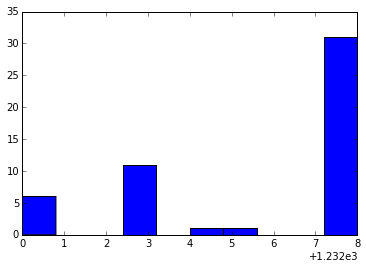

In [31]:
plt.hist(scores); 

And see the best lock:

In [32]:
 show(max(improved_locks, key=word_count))

Lock: SBDCTWFPML OURWYEILHA ILCRETANSO DNTLEKYSAH

Words: BAAL BAAS BACH BACK BAIL BAIT BALD BALE BALK BALL BALS BAND BANE BANK BANS BARD BARE BARK BARN BARS BASE BASH BASK BASS BAST BATE BATH BATS BATT BEAD BEAK BEAN BEAT BECK BEEN BEES BEET BELL BELS BELT BEND BENE BENS BENT BERK BEST BETA BETH BETS BIAS BICE BILE BILK BILL BIND BINE BINS BINT BIOS BIRD BIRK BIRL BISE BISK BITE BITS BITT BLAE BLAH BLAT BLED BLET BLIN BLOT BOAS BOAT BOCK BOIL BOLA BOLD BOLE BOLL BOLT BOND BONE BONK BONY BOOK BOON BOOS BOOT BORA BORE BORK BORN BORT BOSH BOSK BOSS BOTA BOTH BOTS BOTT BRAD BRAE BRAN BRAS BRAT BRAY BREA BRED BREE BREN BRIA BRIE BRIN BRIS BRIT BROS BUCK BULK BULL BUNA BUND BUNK BUNN BUNS BUNT BUOY BURA BURD BURL BURN BURS BURY BUSH BUSK BUSS BUST BUSY BUTE BUTS BUTT BYES BYRE BYRL BYTE CACA CAEL CAID CAIN CALE CALK CALL CANE CANS CANT CARA CARD CARE CARK CARL CARN CARS CART CASA CASE CASH CASK CAST CATE CATS CECA CEES CEIL CELL CELS CELT CENT CERE CESS CETE CHAD CHAT CHAY CHIA CHID CHIN CH

# Is 1240 the maximum?

At first I thought that there are probably locks with more than 1240 words. Bit after a discussion with [Matt Chisholm](https://blog.glyphobet.net/faq), I now think that 1240 might be the maximum (given my 4360 word dictionary).   I came to this realization after investigating how many *different* locks there are in `improved_locks`. The locks all *look* different, but I will define the function `alock` to put each tumbler into alphabetical order:

In [33]:
def alock(lock):
    "Canonicalize lock by alphabetizing the letters in each tumbler."
    return tuple(cat(sorted(tumbler)) for tumbler in lock)

In [34]:
unique_locks = {alock(lock): word_count(lock)
                for lock in improved_locks}
unique_locks

{('BCDFHLMPST', 'AEHILORUWY', 'ACELMNORST', 'ADEKLNPSTY'): 1232,
 ('BCDFLMPSTW', 'AEHILOPRUY', 'ACEILNORST', 'ADEHKLNSTY'): 1240,
 ('BCDFLMPSTW', 'AEHILORUWY', 'ACEILNORST', 'ADEHKLNSTY'): 1240,
 ('BCDFLMPSTW', 'AEHILORUWY', 'ACEILNORST', 'ADEKLMNSTY'): 1236,
 ('BCDGLMPSTW', 'AEHILORUWY', 'AEILMNORST', 'ADEKLNPSTY'): 1235,
 ('BCDHLMPSTW', 'AEHILORUWY', 'ACEILNORST', 'ADEHKLNSTY'): 1237}

So out of the 50 `improved_locks` there are actually only 6 distinct ones. And only two have a score of 1240.

In [35]:
L1240 = {lock for lock in unique_locks if unique_locks[lock] == 1240}
L1240

{('BCDFLMPSTW', 'AEHILOPRUY', 'ACEILNORST', 'ADEHKLNSTY'),
 ('BCDFLMPSTW', 'AEHILORUWY', 'ACEILNORST', 'ADEHKLNSTY')}

These two differ in just one letter (a `P` or a `W` in the second tumbler). 

This discovery changes my whole thinking about the space of scores for locks.  Previously I thought there were many distinct locks with score 1240, and I imagined a spiky "porcupine-shaped" landscape with many peaks at 1240, and therefore it seemed likely that there were other peaks, not yet discovered, at 1240 or higher.  But now I have a different picture of the landscape: it now looks like a single peak consisting of a tiny plateau (just large enough to fit a `P` and a `W`) with rolling hills leading up to the plateau. However, I haven't proven this yet.

# Question 3: Simultaneous Words

Can we make a lock that spells 10 words simultaneously?  One possible approach would be to start with any lock and randomly change it (just as we did with `improved_lock`), but measure improvements by the number of words formed. My intuition is that this approach would work, eventually, but that progress would be very slow, because most random changes to a letter would not make a word.

An alternative approach is to think of the lock not as a list of 4 vertical tumblers (each with 10 letters), but rather as a list of 10 horizontal words (each with 4 letters). I'll call this the *word list* representation, and note that a lock and a word list are *[matrix transposes](http://en.wikipedia.org/wiki/Transpose)* of each other&mdash;they swap rows for columns. There is an [old trick](https://books.google.com/books?id=eH6jBQAAQBAJ&pg=PA574&lpg=PA574&dq=lisp+transpose+matrix&source=bl&ots=Yixwj8m3k4&sig=KoeuJnFhRnJsiD06_Cx56rUOetQ&hl=en&sa=X&ved=0CB4Q6AEwAGoVChMIyM-WiriLxgIVD6OICh2QcwBK#v=onepage&q=transpose%20matrix&f=false) to compute the transpose of a matrix `M` with the expression `zip(*M)`. But `zip` returns a list of tuples; we want strings, so we can define `transpose` as:

In [36]:
def transpose(strings): return [cat(letters) for letters in zip(*strings)]

And we can see the transpose of the `wordlock` is a list of words:

In [37]:
transpose(['SPHMTWDLFB', 
           'LEYHNRUOAI', 
           'ENMLRTAOSK', 
           'DSNMPYLKTE'])

['SLED',
 'PENS',
 'HYMN',
 'MHLM',
 'TNRP',
 'WRTY',
 'DUAL',
 'LOOK',
 'FAST',
 'BIKE']

The first row of the word list has the letters SLED, because those are the letters in the first column of the lock.  You can see that the WordLock&reg; is designed to spell out LOOK FAST BIKE, among other words.

Now we're ready to find a good word list with this strategy:

1. Start with some word list (e.g., a random sample of 10 words from `WORDS`).
2. Pick, at random, one word and change it to a new word.
3. If the change is an improvement, keep the change; otherwise discard the change.
4. Repeat.

But what counts as an improvement?  We can't improve the number of words, because we are only dealing with words. Rather, we will try to improve the number of duplicate letters on any tumbler (of the lock that corresponds to the word list). We improve by reducing the number of duplicate letters, and stop when there are no duplicates.

The following code implements this approach:

In [38]:
def improved_wordlist(wordlist):
    "Find a wordlist that has no duplicate letters, via random changes to wordlist."
    score = duplicates(wordlist)
    while score > 0:
        wordlist2 = changed_wordlist(wordlist)
        score2 = duplicates(wordlist2)
        if score2 < score:   
            wordlist, score = wordlist2, score2
    return wordlist
    
def duplicates(wordlist):
    "The number of duplicate letters across all the tumblers of the lock that corresponds to this wordlist."
    lock = transpose(wordlist) 
    def duplicates(tumbler): return len(tumbler) - len(set(tumbler))
    return sum(duplicates(tumbler) for tumbler in lock)

def changed_wordlist(wordlist, words=list(WORDS)):
    "Make a copy of wordlist and replace one of the words."
    copy    = list(wordlist)
    i       = random.randrange(len(wordlist))
    copy[i] = random.choice(words)
    return copy

The structure of `improved_wordlist` is similar to `improved_lock`, with a few differences:
1. We are minimizing duplicates, not maximizing word count. 
2. We stop when the score is 0, rather than continuing for a given number of iterations.
3. We want to make a `random.choice` from `WORDS`.  But `random.choice` can't operate on a `set`, so we
have to introduce `words=list(WORDS)`.

Now we can find some wordlists:

In [39]:
improved_wordlist(random.sample(WORDS, 10))

['URIC',
 'TACE',
 'OTTO',
 'SLOB',
 'AQUA',
 'RUGS',
 'PSST',
 'BEVY',
 'LOAM',
 'GIED']

That was easy!  Can we go to 11?

In [40]:
improved_wordlist(random.sample(WORDS, 11))

['KHAI',
 'FULL',
 'BRRR',
 'MYTH',
 'PLUG',
 'GIMP',
 'TOON',
 'AMIS',
 'ENVY',
 'REST',
 'LANK']

# Improving Anything

We now have two similar functions, `improved_lock` and `improved_wordlist`.  Could (and should?) we replace them by a single function, say, `improved`, that could improve locks, wordlists, and anything else?

The answer is: *yes* we could, and *maybe* we should.

It is nice to form an abstraction for the idea of *improvement*.  (Traditionally, the method we have used for improvement has been called *hill-climbing*, because of the analogy that the score is like the elevation on a topological map, and we are trying to find our way to a peak.)

However, there are many variations on the theme of *improvement*: maximizing or minimizing? Repeat for a given number of iterations, or continue until we meet a goal?  I don't want `improved` to have an argument list a mile long, and I felt that five arguments is right on the border of acceptable. The arguments are:
1. `item`: The object to start with; this is what we will try to improve.
2. `changed`: a function that generates a new item.
3. `scorer`: a function that evaluates the quality of an item.
4. `stop`: a predicate with args `(i, score, item)`, where `i` is the iteration number, and `score` is `scorer(item)`. Return `True` to stop.
5. `extremum`: By default, this is `max`, meaning we are trying to maximize score; it could also be `min`.

In [41]:
def improved(item, changed, scorer, stop, extremum=max):
    """Apply the function changed to item and evaluate with the function scorer;
    When stop(i, score, item) is true, return item."""
    score = scorer(item)
    for i in itertools.count(0):
        if stop(i, score, item):
            return item
        item2 = changed(item)
        score2 = scorer(item2)
        if score2 == extremum(score, score2):
            item, score = item2, score2

Now we can re-implement `improved_lock` and `improved_wordlist` using `improved`:

In [42]:
def improved_lock(lock, num_changes=2000):
    "Randomly change letters in lock, keeping changes that improve the score."
    def stop_after_num_changes(i, _, __): return i == num_changes
    return improved(lock, changed_lock, word_count, stop_after_num_changes, max)

def improved_wordlist(wordlist):
    "Find a wordlist that has no duplicate letters, via random changes to wordlist."
    def zero_score(_, score, __): return score == 0
    return improved(wordlist, changed_wordlist, duplicates, zero_score, min)

In [43]:
show(improved_lock(random_lock()))

Lock: HBDTLCFSPM AUIROLYWEH RTLONAESCI DKANYEHLTS

Words: BAAL BAAS BACH BACK BAIL BAIT BALD BALE BALK BALL BALS BAND BANE BANK BANS BARD BARE BARK BARN BARS BASE BASH BASK BASS BAST BATE BATH BATS BATT BEAD BEAK BEAN BEAT BECK BEEN BEES BEET BELL BELS BELT BEND BENE BENS BENT BERK BEST BETA BETH BETS BIAS BICE BILE BILK BILL BIND BINE BINS BINT BIOS BIRD BIRK BIRL BISE BISK BITE BITS BITT BLAE BLAH BLAT BLED BLET BLIN BLOT BOAS BOAT BOCK BOIL BOLA BOLD BOLE BOLL BOLT BOND BONE BONK BONY BOOK BOON BOOS BOOT BORA BORE BORK BORN BORT BOSH BOSK BOSS BOTA BOTH BOTS BOTT BRAD BRAE BRAN BRAS BRAT BRAY BREA BRED BREE BREN BRIA BRIE BRIN BRIS BRIT BROS BUCK BULK BULL BUNA BUND BUNK BUNN BUNS BUNT BUOY BURA BURD BURL BURN BURS BURY BUSH BUSK BUSS BUST BUSY BUTE BUTS BUTT BYES BYRE BYRL BYTE CACA CAEL CAID CAIN CALE CALK CALL CANE CANS CANT CARA CARD CARE CARK CARL CARN CARS CART CASA CASE CASH CASK CAST CATE CATS CECA CEES CEIL CELL CELS CELT CENT CERE CESS CETE CHAD CHAT CHAY CHIA CHID CHIN CH

In [44]:
improved_wordlist(random.sample(WORDS, 10))

['UMBO',
 'BREN',
 'COST',
 'WHUP',
 'RUGA',
 'KIRK',
 'ACME',
 'IDOL',
 'ONYX',
 'ETHS']

# Question 4: Coincidence?

There is still one unanswered question: did the designers of WordLock&reg; deliberately put  "FRED BUNS" in, or was it a coincidence? Astute Hacker News reader [emhart](https://news.ycombinator.com/user?id=emhart) commented that he had found the [patent](https://www.google.com/patents/US6621405) assigned to WordLock; it describes an algorithm similar to my `greedy_lock`.
After seeing that, I'm inclined to believe that "FRED BUNS" is the coincidental result of running the algorithm. On
the other hand, there is a [followup patent](https://www.google.com/patents/US20080053167) that discusses a refinement
"wherein the letters on the wheels are configured to spell a first word displayed on a first row of letters and a second word displayed on a second row of letters." So the possibility of a two-word phrase was somthing that Wordlock LLc. was aware of.

We see below that the procedure described in the [patent](https://www.google.com/patents/US6621405) is not quite as good as `greedy_lock`, because the patent states that at each tumbler position "*the entire word list is scanned*" to produce the letter frequencies, whereas `greedy_lock` scans only the words that are consistent with the previous tumblers, and thus `greedy_lock` produces more words, 1177 to 1161.

In [45]:
def patented_lock(d=4, c=10, words=WORDS):
    "Make a lock with d tumblers, each consisting of the c letters that cover the most words at that position."
    lock = Lock('?' * d)
    for i in range(d):
        # Make a tumbler of c letters, to be used in position i, such that the tumbler covers the most words.
        counter = Counter(word[i] for word in words)
        lock[i] = Tumbler(L for (L, _) in counter.most_common(10))
        #words  = {w for w in words if w[i] in lock[i]} ## The patent skips this step
    return lock

word_count(greedy_lock()), word_count(patented_lock())

(1177, 1161)

# Tests

It is a 
good idea to have some tests, in case you want to change some code and see if you have introduced an error. Also, tests serve as examples of usage of functions. The following tests have poor coverage, because it is harder to test non-deterministic functions, and I didn't attempt that here.

In [46]:
def tests():
    assert 'WORD' in WORDS
    assert 'FRED' in WORDS
    assert 'BUNS' in WORDS
    assert 'XYZZ' not in WORDS
    assert 'word' not in WORDS
    assert 'FIVER' not in WORDS
    assert len(WORDS) == 4360
    
    assert fredbuns == ['FB', 'RU', 'EN', 'DS']
    assert combinations(fredbuns) == ['FRED','FRES','FRND','FRNS','FUED','FUES','FUND','FUNS',
                                      'BRED','BRES','BRND','BRNS','BUED','BUES','BUND','BUNS']
    assert words_from(fredbuns) ==   ['FRED', 'FUND', 'FUNS', 'BRED', 'BUND', 'BUNS']

    assert wordlock        == ['SPHMTWDLFB', 'LEYHNRUOAI', 'ENMLRTAOSK', 'DSNMPYLKTE']
    assert len(combinations(wordlock)) == 10000
    assert word_count(wordlock) == 1118
    
    assert transpose(['HIE', 'BYE']) == ['HB', 'IY', 'EE']
    assert transpose(transpose(wordlock)) == wordlock
    assert mean([3, 4, 5]) == 4
    assert mean([True, False, False, False]) == 0.25
    
    return 'tests pass'
    
tests()

'tests pass'

# One More Question

I wonder if [@BIKESNOBNYC](https://twitter.com/bikesnobnyc) would appreciate this notebook?  On the one hand, he is the kind of guy who, in discussing the fact that bicycling is the seventh most popular recreational activity,  [wrote]() "*the number seven is itself a highly significant number. It is the lowest number that cannot be represented as the sum of the square of three integers*," so it seems he has some interest in mathematical oddities.  On the other hand, he followed that up by writing "*I have no idea what that means, but it's true*," so maybe not.

In [1]:
def not_sum_3_squares(N):
    "Positive integers < N that are not the sum of three squares."
    squares = [i ** 2 for i in range(int(N ** 0.5)+1)]
    sums = {A + B + C for A in squares for B in squares for C in squares}
    return set(range(N)) - sums

not_sum_3_squares(100)

{7, 15, 23, 28, 31, 39, 47, 55, 60, 63, 71, 79, 87, 92, 95}